### Tugas Besar IF2220 Probabilitas dan Statistika - Penarikan Kesimpulan dan Pengujian Hipotesis 
#### Dibuat oleh
- Angelica Kiera Ninta Gurning - 13522048 - 13522048@std.stei.itb.ac.id @angiekierra
- Imanuel Sebastian Girsang -13522058 - 13522058@std.stei.itb.ac.id @ImanuelSG




### 0. Setup Dependencies and Database

#### Data Cleaning
Untuk memastikan data yang berkualitas, diperlukan suatu prosedur untuk memastikan konsistensi dan validitas data. Beberapa hal yang akan dihapus adalah
- Data yang duplikat
- Atribute yang negatif
- Atribut yang tidak sesuai dengan keadaan di dunia nyata

Untuk menemukan persebaran data yang mungkin menjadi tidak sesuai, dapat dicari nilai-nilai yang mungkin bernilai tidak sesuai, dengan mencari nilai unik dari setiap kolom dan menghapus yang sekiranya tidak sesuai.


In [100]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tabulate import tabulate


In [101]:
dataset = pd.read_csv('health.csv')

## Setup dictionary dari nilai unik setiap kolom
unique_values = {}

for column in dataset.columns:
    ##cek nilai unik di setiap kolom
    ## sort dari yang terkecil untuk dapat melihat data yang tidak valid dengan lebih mudah
    unique_values[column] = sorted(dataset[column].unique())


## Print semua
print ("Semua nilai unik di setiap kolom adalah : ")
for key, value in unique_values.items():
    print(f"{key} : {value[:20]}")

Semua nilai unik di setiap kolom adalah : 
Unnamed: 0 : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Age : [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Income : [-1088986.5264049638, -967729.1254288526, -637266.3376062792, -523574.5287477607, -494410.3215827923, -471927.4133214494, -341848.3845844874, -304466.51599105913, -223218.4896024913, -158270.5345450053, -130776.97007383034, -118514.5270595122, -59339.86114004906, -43277.37153355125, -36434.1797934426, -27027.2837487096, -6596.02451101318, 755.4092140235007, 6167.984879105352, 124912.44322982336]
Gender : ['Female', 'Male']
Education : ["Bachelor's Degree", 'High School', "Master's Degree", 'Other', 'PhD', 'undefined']
Stress_Level : [2.5280566074548134, 2.661764022921185, 2.6863077453836284, 2.7283184272072063, 2.7452019120148683, 2.7824877739053453, 2.874310381641708, 2.9467047746909647, 2.9589791610891814, 3.0384924543925558, 3.070916143968384, 3.0864715469003805, 

Dari hasil tersebut, beberapa hal yang dapat diperbaiki adalah
- Data di kolom "Income" dan "Exercise_Hours_Per_Week" yang bernilai negatif
- Data di kolom "Education" yang bernilai 'undefined'
- Data di kolom "Blood_Pressure" yang sudah bernilai 0 (tidak seharusnya)
- Merename Kolom "Unnamed : 0" menjadi nomor

Maka akan dilakukan penghapusan data yang bernilai dipulikat dan memenuhi kriteria diatas.

In [102]:
print("Original dataset shape:", dataset.shape)
original_count = len(dataset)

# Remove rows with income < 0
before_count = len(dataset)
dataset = dataset[dataset['Income'] >= 0]
income_removed = before_count - len(dataset)
print(f"Baris yang dihapus karena income < 0: {income_removed}")

# Remove rows with exercise_hours_per_week < 0
before_count = len(dataset)
dataset = dataset[dataset['Exercise_Hours_Per_Week'] >= 0]
exercise_removed = before_count - len(dataset)
print(f"Baris yang dihapus karena exercise_hours_per_week < 0: {exercise_removed}")

# Remove rows with education undefined
before_count = len(dataset)
dataset = dataset[dataset['Education'] != 'undefined']
education_removed = before_count - len(dataset)
print(f"Baris yang dihapus karena education undefined: {education_removed}")

# Remove rows with blood_pressure = 0
before_count = len(dataset)
dataset = dataset[dataset['Blood_Pressure'] != 0]
blood_pressure_removed = before_count - len(dataset)
print(f"Baris yang dihapus karena tekanan darah = 0: {blood_pressure_removed}")

# Remove duplicate rows
before_count = len(dataset)
dataset = dataset.drop_duplicates()
duplicates_removed = before_count - len(dataset)
print(f"Baris yang dihapus karena duplikat: {duplicates_removed}")

# Cleaned dataset shape
cleaned_count = len(dataset)
print("Cleaned dataset shape:", dataset.shape)
print(f"Total baris dihapus: {original_count - cleaned_count}")

# Change column name to No

dataset = dataset.rename(columns={'Unnamed: 0': 'No'})

# Save the cleaned dataset to a new CSV file
dataset.to_csv('cleaned_file.csv', index=False)

Original dataset shape: (2000, 12)
Baris yang dihapus karena income < 0: 17
Baris yang dihapus karena exercise_hours_per_week < 0: 41
Baris yang dihapus karena education undefined: 3
Baris yang dihapus karena tekanan darah = 0: 2
Baris yang dihapus karena duplikat: 0
Cleaned dataset shape: (1937, 12)
Total baris dihapus: 63


### 1. Deskripsi Statistika

Data yang bersifat numerik akan diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string akan dicari unique values dan proporsi-nya


In [103]:
## Untuk data numerik
def getMean(column : pd.core.series.Series):
    ## Hanya bisa kalau valuenya angka
    if not pd.api.types.is_numeric_dtype(column):
        return None
    return sum(column) / len(column)

def getMedian(column : pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    ## Sort nilai agar lebih mudah menemukan median
    column = column.sort_values()
    n = len(column)
    if n % 2 == 1:
        return column.iloc[n // 2]
    else:
        return (column.iloc[n // 2] + column.iloc[n // 2 - 1]) / 2
    
def getModus(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    values = {}
    for value in column:
        if value not in values:
            values[value] = 1
        else:
            values[value] += 1

    return max(values, key=values.get)

def getVariansi(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    mean = getMean(column)
    return sum((x - mean) ** 2 for x in column) / len(column)

def getStandarDeviasi(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    return getVariansi(column) ** 0.5

def getMinimum(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    
    min = column[0]

    for value in column:
        if value < min:
            min = value
    return min

def getMaximum(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    max = column[0]

    for value in column:
        if value > max:
            max = value

    return max

def getRange(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    return getMaximum(column) - getMinimum(column)

def getQ1(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    sorted_column = column.sort_values().values
    n = len(sorted_column)
    pos = (n + 1) * 0.25
    if pos.is_integer():
        return sorted_column[int(pos) - 1]
    else:
        lower = sorted_column[int(np.floor(pos)) - 1]
        upper = sorted_column[int(np.ceil(pos)) - 1]
        return (lower + upper) / 2

def getQ2(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    return getMedian(column)

def getQ3(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    sorted_column = column.sort_values().values
    n = len(sorted_column)
    pos = (n + 1) * 0.75
    if pos.is_integer():
        return sorted_column[int(pos) - 1]
    else:
        lower = sorted_column[int(np.floor(pos)) - 1]
        upper = sorted_column[int(np.ceil(pos)) - 1]
        return (lower + upper) / 2

def getIQR(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    q1 = getQ1(column)
    q3 = getQ3(column)
    return q3 - q1

def getSkewness(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None

    std = getStandarDeviasi(column)
    mean = getMean(column)

    total = sum((x - mean) ** 3 for x in column)
    n = len(column)

    return total/ (std** 3 * n) 



def getKurtosis(column: pd.core.series.Series):
    if not pd.api.types.is_numeric_dtype(column):
        return None
    
    std = getStandarDeviasi(column)
    n = len(column)
    mean = getMean(column)

    total = sum((x - mean) ** 4 for x in column)

    return total / (std ** 4 * n)-3

## Untuk data string

def getFrequency(column: pd.core.series.Series):
    if pd.api.types.is_numeric_dtype(column):
        return None
    values = {}
    for value in column:
        if value not in values:
            values[value] = 1
        else:
            values[value] += 1
    return values

def getUniqueValues(column: pd.core.series.Series):
    if pd.api.types.is_numeric_dtype(column):
        return None
    
    unique = {}
    for value in column:
        if value not in unique:
            unique[value] = 1
    return list(unique.keys())

In [104]:
## Print data 
def print_summary(dataset):
    headers = ["Age","Income","Stress_Level","Exercise_Hours_Per_Week","Cholesterol_Level", "Weight","Height","Blood_Pressure"]
    row = [["Mean"],["Median"],["Modus"],["Variansi"],["Standard Deviasi"],["Minimum"],["Maximum"],["Range"],["Q1"],["Q2"],["Q3"],["IQR"],["Skewness"],["Kurtosis"]]

    for column in dataset.columns:
        data = dataset[column]
        if pd.api.types.is_numeric_dtype(data) and column != "No":
            row[0].append(getMean(data))
            row[1].append(getMedian(data))
            row[2].append(getModus(data))
            row[3].append(getVariansi(data))
            row[4].append(getStandarDeviasi(data))
            row[5].append(getMinimum(data))
            row[6].append(getMaximum(data))
            row[7].append(getRange(data))
            row[8].append(getQ1(data))
            row[9].append(getQ2(data))
            row[10].append(getQ3(data))
            row[11].append(getIQR(data))
            row[12].append(getSkewness(data))
            row[13].append(getKurtosis(data))
        elif column != "No":
            str_header = []
            str_header.append("Statistika")
            str_header.append(column)
            frequency = getFrequency(data)
            rows = []
            for key, value in frequency.items():
                rows.append([key, value])
            rows.append(["Unique Values", getUniqueValues(data)])
            print(tabulate(rows, headers=str_header, tablefmt="pretty"))
            

    print(tabulate(row, headers=headers, tablefmt="pretty"))
    print("\n")

def print_summary_from_library(dataset):
    headers = ["Age","Income","Stress_Level","Exercise_Hours_Per_Week","Cholesterol_Level", "Weight","Height","Blood_Pressure"]
    row = [["Mean"],["Median"],["Modus"],["Variansi"],["Standard Deviasi"],["Minimum"],["Maximum"],["Range"],["Q1"],["Q2"],["Q3"],["IQR"],["Skewness"],["Kurtosis"]]

    for column in dataset.columns:
        data = dataset[column]
        if pd.api.types.is_numeric_dtype(data) and column != "No":
            row[0].append(data.mean())
            row[1].append(data.median())
            row[2].append(data.mode().values[0])
            row[3].append(data.var())
            row[4].append(data.std())
            row[5].append(data.min())
            row[6].append(data.max())
            row[7].append(data.max() - data.min())
            row[8].append(data.quantile(0.25))
            row[9].append(data.quantile(0.5))
            row[10].append(data.quantile(0.75))
            row[11].append(data.quantile(0.75) - data.quantile(0.25))
            row[12].append(data.skew())
            row[13].append(data.kurtosis())
        elif column != "No":
            str_header = []
            str_header.append("Statistika")
            str_header.append(column)
            frequency = getFrequency(data)
            rows = []
            for key, value in frequency.items():
                rows.append([key, value])
            rows.append(["Unique Values", getUniqueValues(data)])
            print(tabulate(rows, headers=str_header, tablefmt="pretty"))

    print(tabulate(row, headers=headers, tablefmt="pretty"))


dataset = pd.read_csv('cleaned_file.csv')
print ("Hasil dari fungsi buatan sendiri")
print_summary(dataset)
print ("Hasil dari fungsi yang disediakan library")
print_summary_from_library(dataset)
    

Hasil dari fungsi buatan sendiri
+---------------+--------------------+
|  Statistika   |       Gender       |
+---------------+--------------------+
|     Male      |        957         |
|    Female     |        980         |
| Unique Values | ['Male', 'Female'] |
+---------------+--------------------+
+-------------------+-------------------------------------------------------------------------+
|    Statistika     |                                Education                                |
+-------------------+-------------------------------------------------------------------------+
| Bachelor's Degree |                                   914                                   |
|  Master's Degree  |                                   476                                   |
|    High School    |                                   256                                   |
|        PhD        |                                   238                                   |
|       Other       | 

### 2. Outlier pada data
Outlier merupakan data" yang bisa dibilang relatif tidak general dan sangat jauh nilainya dari data-data lainnya. Untuk mendapatkan outlier-outlier tersebut, dapat digunakan beberapa metode diantaranya:
- Metode IQR
- Analisis BoxPlot
- Metode Z-Score
- Metode DBSCAN
- Metode Model Linier

Setelah mengidentifikasi outlier, terdapat beberapa cara untuk menanganinya yaitu:
- Menghapusnya dari dataset (jika jumlahnya sedikit dan bisa dianggap sebagai data yang tidak valid).
- Menggantinya dengan nilai yang valid, seperti menggunakan metode imputasi seperti mean, median, atau interpolasi.
- Menggunakan metode analisis yang lebih canggih untuk menangani outlier, seperti metode robust regression.

Untuk kemudahan, pada pembahasan kali ini akan menggunakan metode IQR. Data-data yang dianggap sebagai outlier akan dihapus dari dataset.



In [105]:
def remove_outliers(df):
    removed_outliers = []
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]) and column != 'No':
            # Calculate bounds
            Q1 = getQ1(df[column])
            Q3 = getQ3(df[column])
            IQR = getIQR(df[column])
            
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            for index, row in df.iterrows():
                value = row[column]
                if value < lower_bound or value > upper_bound:
                    # Append outlier information as dictionary
                    removed_outliers.append({
                        'No': row['No'],
                        'Column': column,
                        'Outlier Value': value,
                        'Lower Bound': lower_bound,
                        'Upper Bound': upper_bound
                    })
                    # Drop the row containing outlier
                    df = df.drop(index)
    
    return df.reset_index(drop=True), pd.DataFrame(removed_outliers)
      
print ("Panjang dataset sebelum outliers dihapus : ", len(dataset))
# Remove outliers
cleaned_dataset, removed_outliers = remove_outliers(dataset)

dataset = cleaned_dataset

print ("Panjang dataset setelah outliers dihapus : ", len(dataset))

# Print removed outliers
print("Outliers Dihapus:")
print(removed_outliers)

Panjang dataset sebelum outliers dihapus :  1937
Panjang dataset setelah outliers dihapus :  1822
Outliers Dihapus:
       No          Column  Outlier Value    Lower Bound   Upper Bound
0     579          Income   1.044300e+07 -388716.231090  1.026976e+07
1     673          Income   1.060307e+07 -388716.231090  1.026976e+07
2    1328          Income   1.222749e+07 -388716.231090  1.026976e+07
3    1460          Income   1.036827e+07 -388716.231090  1.026976e+07
4    1686          Income   1.198891e+07 -388716.231090  1.026976e+07
..    ...             ...            ...            ...           ...
110  1643  Blood_Pressure   4.445000e+01      92.874692  1.469211e+02
111  1696  Blood_Pressure   1.544277e+02      92.874692  1.469211e+02
112  1744  Blood_Pressure   9.275803e+01      92.874692  1.469211e+02
113  1807  Blood_Pressure   9.256104e+01      92.874692  1.469211e+02
114  1920  Blood_Pressure   2.009500e+02      92.874692  1.469211e+02

[115 rows x 5 columns]


### 3.Visualisasi Plot Distribusi
Membuat Visualisasi plot distribusi. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut. Jika numerik dapat dibuat dalam bentuk histogram dan box plot, dan jika string dengan histogram. 

##### 1. Kolom Age

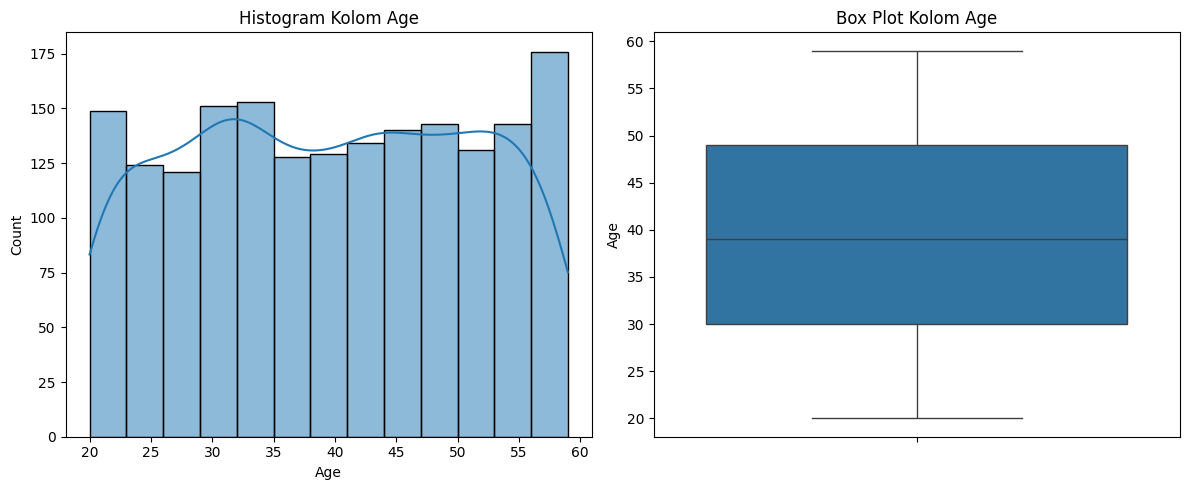

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Age"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Age"}')

# Box Plot
sns.boxplot(y=dataset["Age"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Age"}')

plt.tight_layout()
plt.show()

Dari data tersebut, dapat dilihat bahwa data umur tersebar secara merata di setiap kalangan umur. Tidak ada suatu kelompok umur yang terlalu mendominasi persebaran. Dapat dilihat juga dari box plot yang ada di sebelah kanan, nilai maksimum dan minimum dari kolom ini relatif tidak terlalu jauh dari quartilnya. Hal ini menjadi wajar sebab tadi sudah dilakukan proses data cleansing terhadap kolom ini.

##### 2. Income

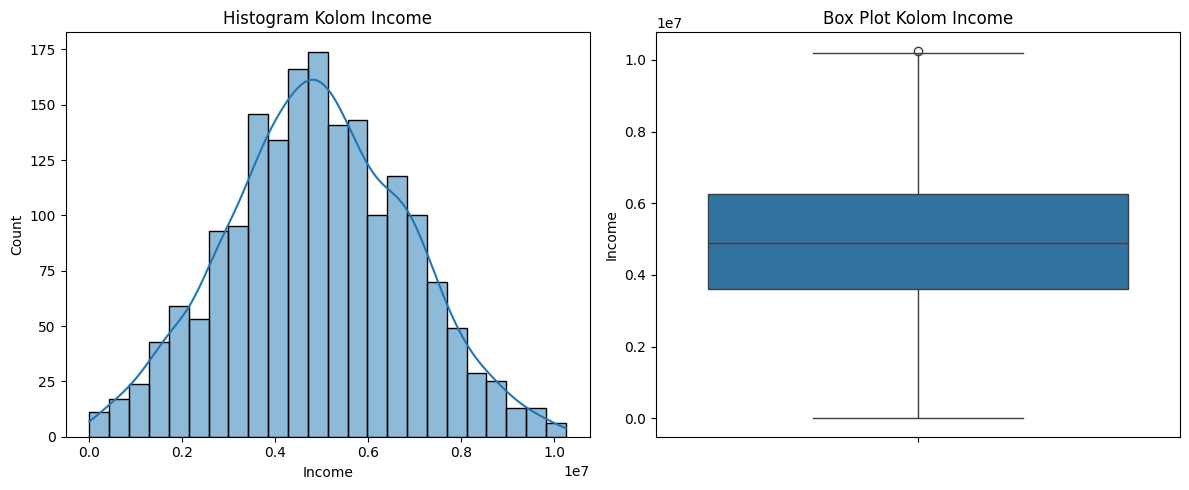

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Income"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Income"}')

# Box Plot
sns.boxplot(y=dataset["Income"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Income"}')

plt.tight_layout()
plt.show()

Dari data tersebut dapat dilihat bahwa data income hampir berdistribusi normal namun sedikit skew ke kiri / positive skew. Terdapat beberapa lonjakan di bagian kiri income yang menyebabkan data sedikit dominan di nilai lebih kecil dari median.

##### 3.Stress_Level

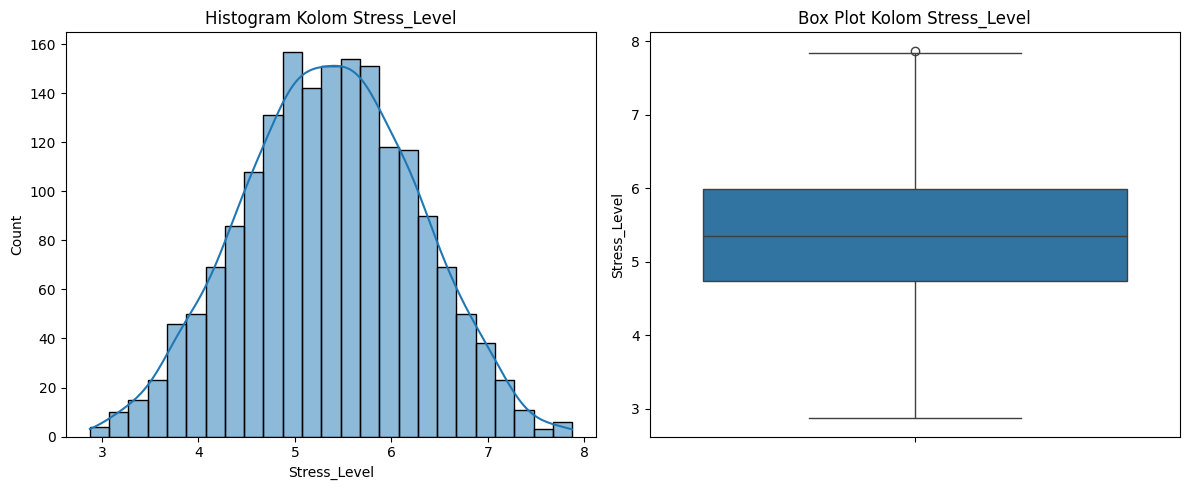

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Stress_Level"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Stress_Level"}')

# Box Plot
sns.boxplot(y=dataset["Stress_Level"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Stress_Level"}')

plt.tight_layout()
plt.show()

Data stress_level bisa dibilang berdistribusi normal dengan baik. Dapat dilihat bahwa persebaran datanya paling banyak di daerah dekat median, dan menurun seiring menjauh dari median. Walaupun di beberapa posisi seperti di bagian stress_level 5, dapat dilihat bahwa terjadi naik turun frekuensi disana.

##### 4. Exercise_Hours_Per_Week

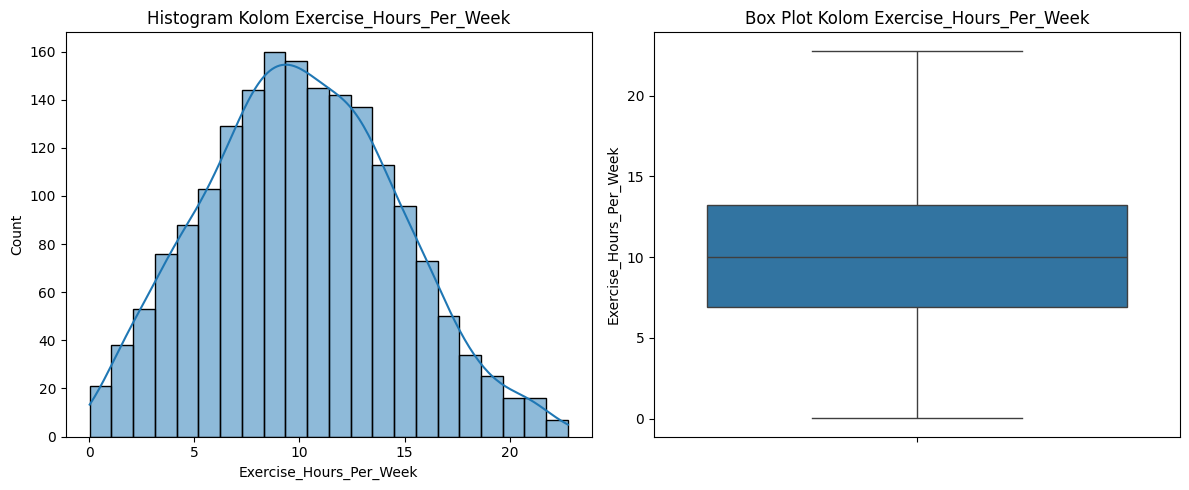

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Exercise_Hours_Per_Week"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Exercise_Hours_Per_Week"}')

# Box Plot
sns.boxplot(y=dataset["Exercise_Hours_Per_Week"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Exercise_Hours_Per_Week"}')

plt.tight_layout()
plt.show()

Untuk data Excercise Houers Per Week, dapat dilihat bahwa data mengikuti positive skew sebab frekuensinya lebih condong pada data-data yang lebih kecil dari median. Dapat dilihat pula pada Box Plot bahwa box yang ada relatif menurun dan tidak di tengah.

##### 5. Cholesterol_Level

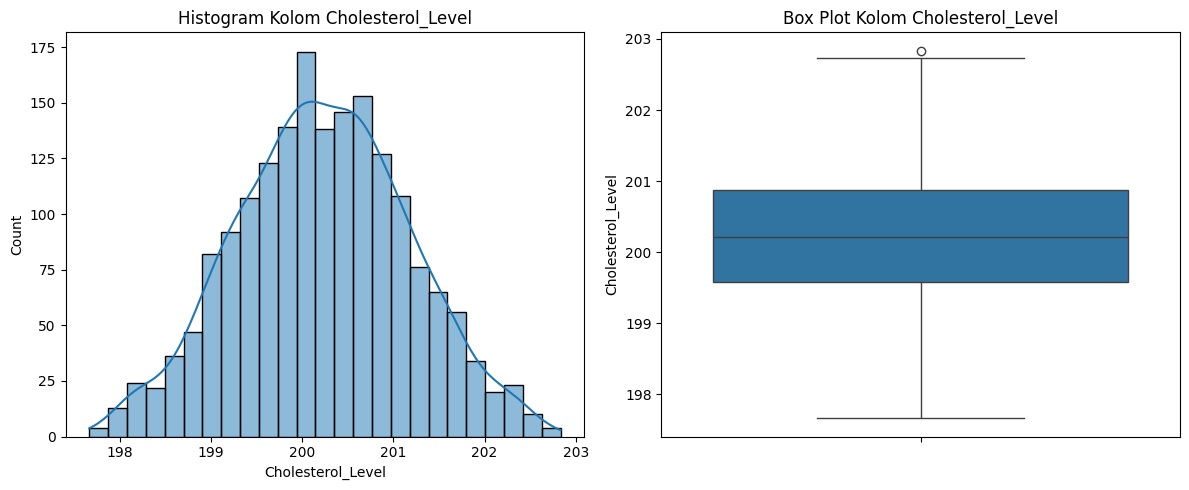

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Cholesterol_Level"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Cholesterol_Level"}')

# Box Plot
sns.boxplot(y=dataset["Cholesterol_Level"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Cholesterol_Level"}')

plt.tight_layout()
plt.show()

##### 6. Weight

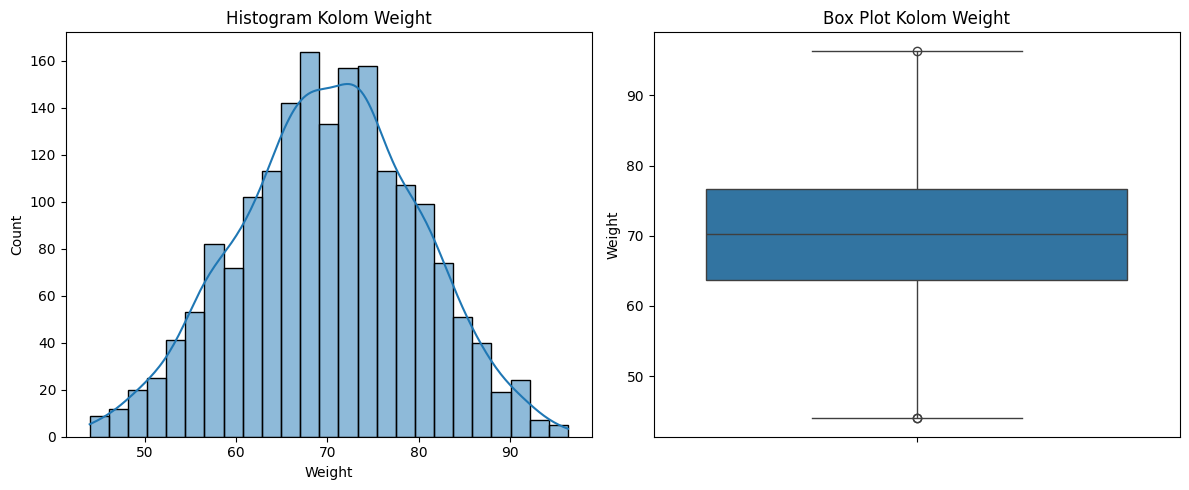

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Weight"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Weight"}')

# Box Plot
sns.boxplot(y=dataset["Weight"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Weight"}')

plt.tight_layout()
plt.show()

##### 7. Height

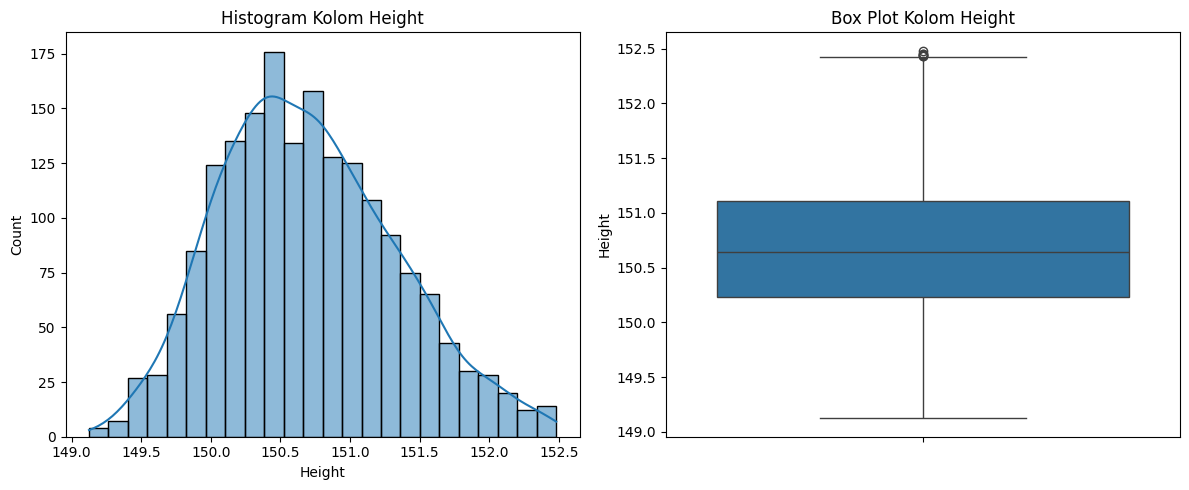

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Height"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Height"}')

# Box Plot
sns.boxplot(y=dataset["Height"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Height"}')

plt.tight_layout()
plt.show()

Kolom Height mengikuti Positive skew 

##### 8. Blood_Pressure

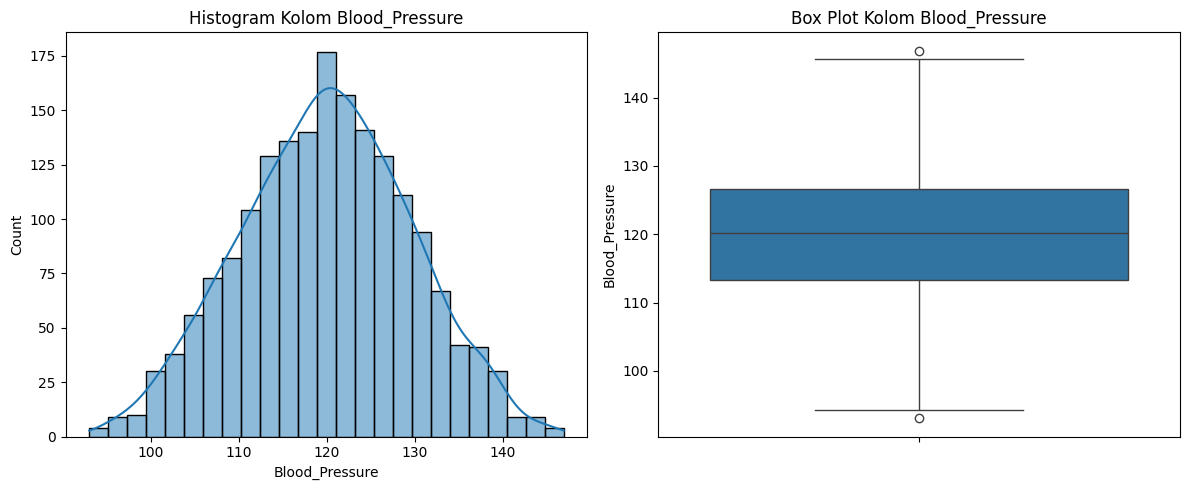

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Blood_Pressure"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Blood_Pressure"}')

# Box Plot
sns.boxplot(y=dataset["Blood_Pressure"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Blood_Pressure"}')

plt.tight_layout()
plt.show()

Dari grafik tersebut, dapat dilihat bahwa data Blood_Pressure relatif berdistribusi normal. Walaupun tidak sempurna, namun dapat dilihat bahwa data yang ada paling banyak berdistribusi di dekat mediannya, dan menurun ketika lebih besar ataupun lebih kecil dari median.

### 4. Menentukan Distribusi Kolom Numerik
Untuk menentukan 


##### 1. Age

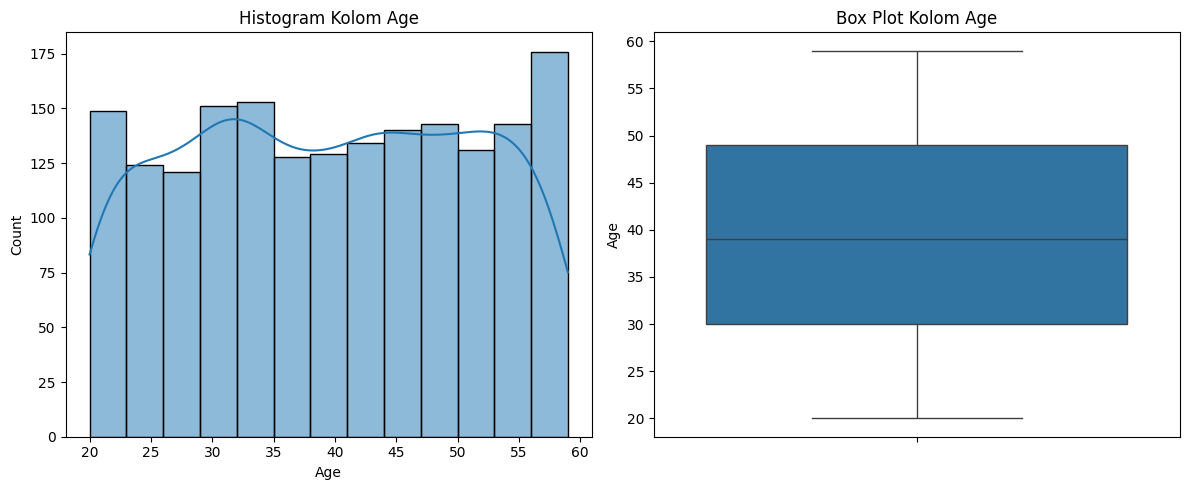

Hasil perhitungan skewness dari kolom Age :  -0.012067873917076833
Hasil perhitungan kurtosis dari kolom Age :  -1.1942806977624962


In [114]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Age"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Age"}')

# Box Plot
sns.boxplot(y=dataset["Age"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Age"}')

plt.tight_layout()
plt.show()

print ("Hasil perhitungan skewness dari kolom Age : ", getSkewness(dataset["Age"]))
print ("Hasil perhitungan kurtosis dari kolom Age : ", getKurtosis(dataset["Age"]))

Ini Penjelasan Kolom Age

##### 2. Income

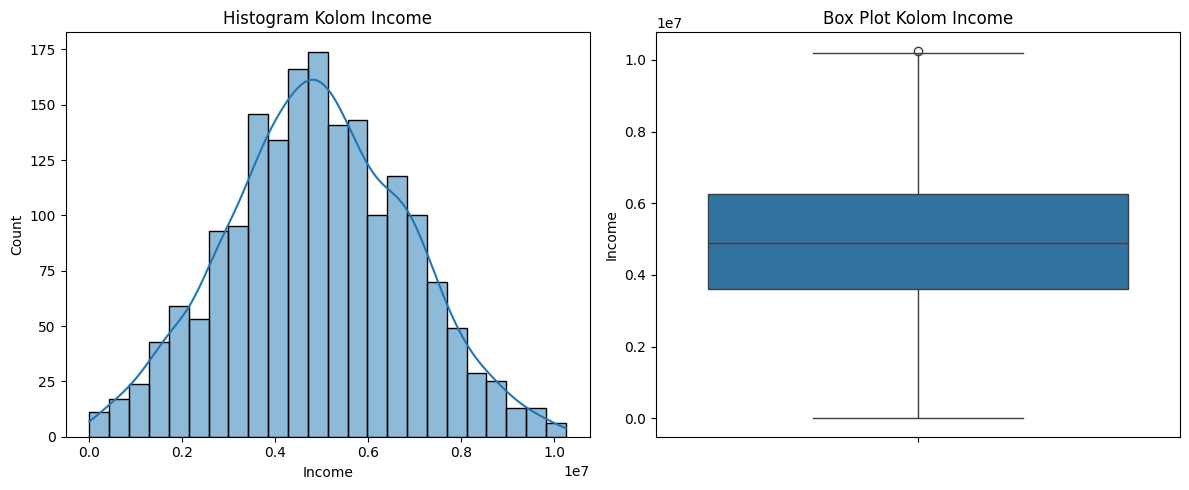

Hasil perhitungan skewness dari kolom Income :  0.027591567630419422
Hasil perhitungan kurtosis dari kolom Income :  -0.30138624176319917


In [115]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Income"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Income"}')

# Box Plot
sns.boxplot(y=dataset["Income"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Income"}')

plt.tight_layout()
plt.show()

print ("Hasil perhitungan skewness dari kolom Income : ", getSkewness(dataset["Income"]))
print ("Hasil perhitungan kurtosis dari kolom Income : ", getKurtosis(dataset["Income"]))

Ini penjelasan kolom income

##### 3. Stress_Level

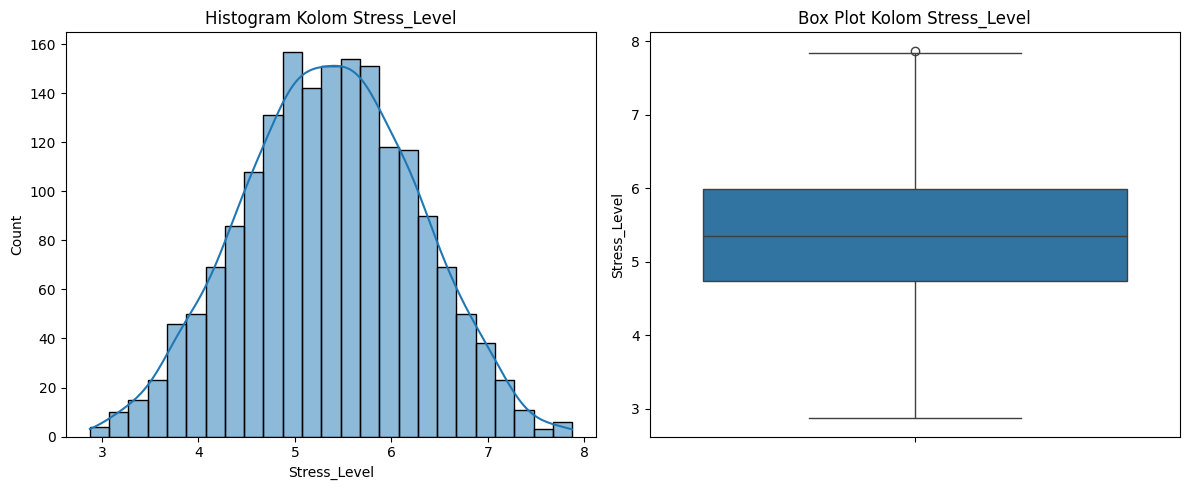

Hasil perhitungan skewness dari kolom Stress_Level :  -0.02387162036105939
Hasil perhitungan kurtosis dari kolom Stress_Level :  -0.3481925246993933


In [116]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Stress_Level"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Stress_Level"}')

# Box Plot
sns.boxplot(y=dataset["Stress_Level"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Stress_Level"}')

plt.tight_layout()
plt.show()

print ("Hasil perhitungan skewness dari kolom Stress_Level : ", getSkewness(dataset["Stress_Level"]))
print ("Hasil perhitungan kurtosis dari kolom Stress_Level : ", getKurtosis(dataset["Stress_Level"]))

Ini penjelasan kolom stress_level

##### 4. Exercise_Hours_Per_Week

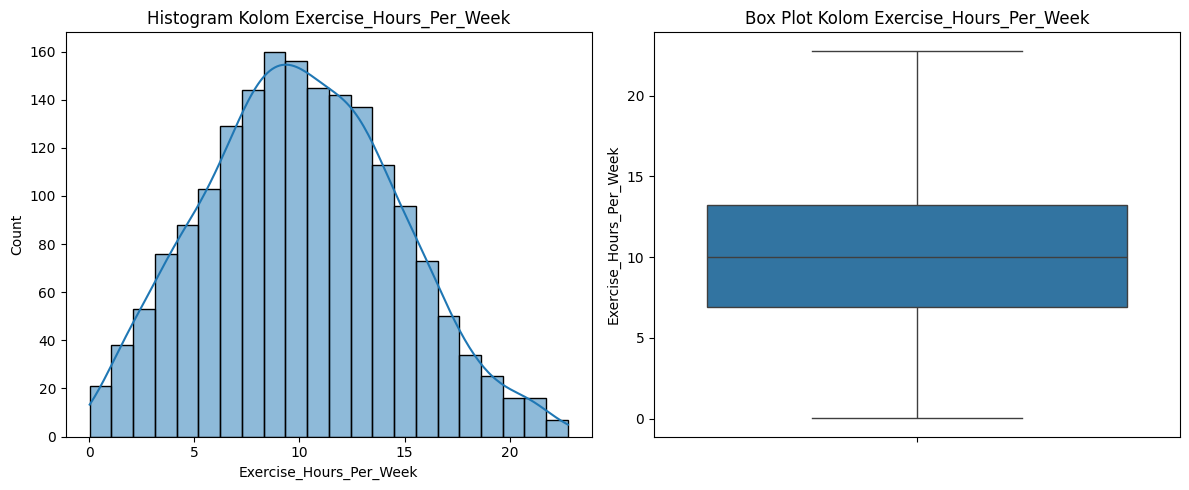

Hasil perhitungan skewness dari kolom Exercise_Hours_Per_Week :  0.15473558648898464
Hasil perhitungan kurtosis dari kolom Exercise_Hours_Per_Week :  -0.40663555402346185


In [117]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Exercise_Hours_Per_Week"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Exercise_Hours_Per_Week"}')

# Box Plot
sns.boxplot(y=dataset["Exercise_Hours_Per_Week"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Exercise_Hours_Per_Week"}')

plt.tight_layout()
plt.show()

print ("Hasil perhitungan skewness dari kolom Exercise_Hours_Per_Week : ", getSkewness(dataset["Exercise_Hours_Per_Week"]))
print ("Hasil perhitungan kurtosis dari kolom Exercise_Hours_Per_Week : ", getKurtosis(dataset["Exercise_Hours_Per_Week"]))

Ini penjelasan kolom exercise

##### 5. Cholesterol_Level

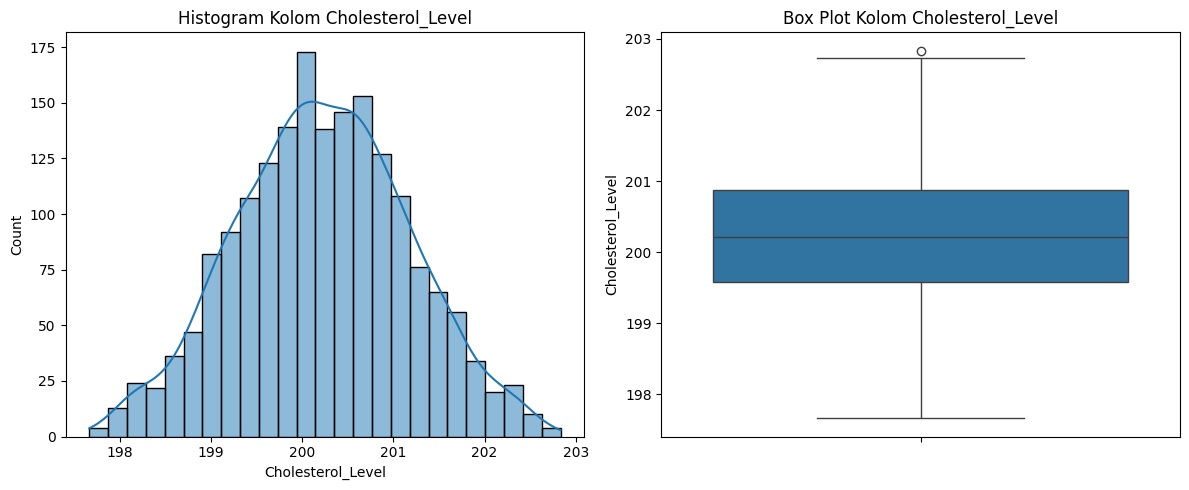

Hasil perhitungan skewness dari kolom Cholesterol_Level :  -0.0014229597996318517
Hasil perhitungan kurtosis dari kolom Cholesterol_Level :  -0.30146587898638844


In [118]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Cholesterol_Level"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Cholesterol_Level"}')

# Box Plot
sns.boxplot(y=dataset["Cholesterol_Level"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Cholesterol_Level"}')

plt.tight_layout()
plt.show()

print ("Hasil perhitungan skewness dari kolom Cholesterol_Level : ", getSkewness(dataset["Cholesterol_Level"]))
print ("Hasil perhitungan kurtosis dari kolom Cholesterol_Level : ", getKurtosis(dataset["Cholesterol_Level"]))

Ini penjelasan kolom height

##### 6. Weight

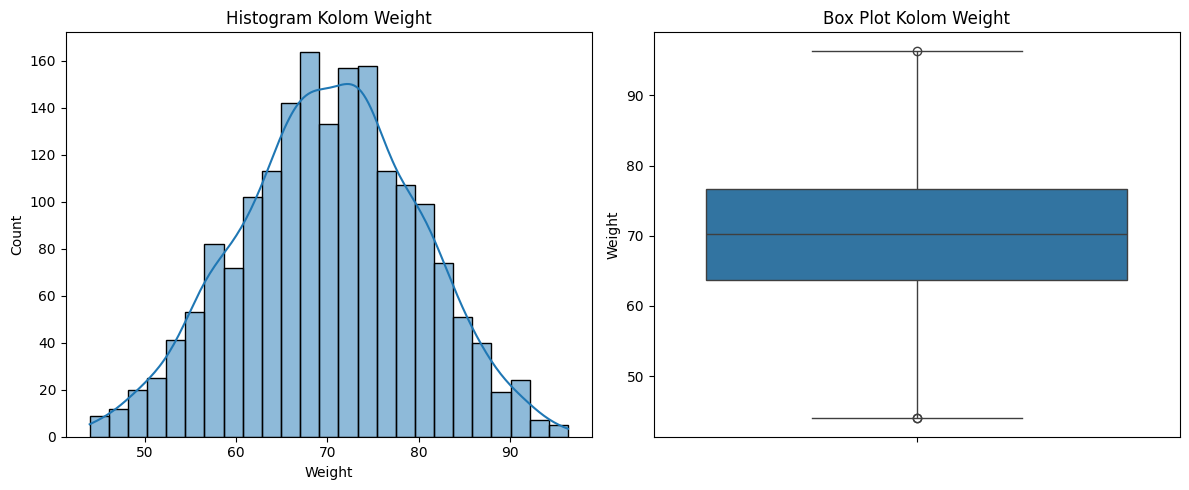

Hasil perhitungan skewness dari kolom Weight :  -0.07091003729609903
Hasil perhitungan kurtosis dari kolom Weight :  -0.317645803568972


In [119]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Weight"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Weight"}')

# Box Plot
sns.boxplot(y=dataset["Weight"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Weight"}')

plt.tight_layout()
plt.show()

print ("Hasil perhitungan skewness dari kolom Weight : ", getSkewness(dataset["Weight"]))
print ("Hasil perhitungan kurtosis dari kolom Weight : ", getKurtosis(dataset["Weight"]))

Ini penjelasan kolom weight

##### 7. Height

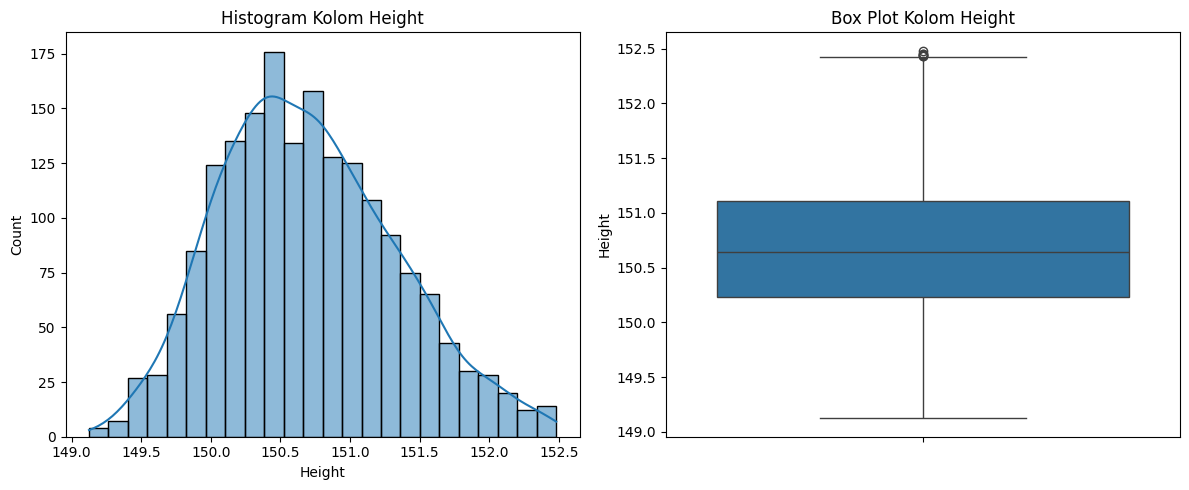

Hasil perhitungan skewness dari kolom Height :  0.34666469787360105
Hasil perhitungan kurtosis dari kolom Height :  -0.261063399791305


In [120]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Height"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Height"}')

# Box Plot
sns.boxplot(y=dataset["Height"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Height"}')

plt.tight_layout()
plt.show()

print ("Hasil perhitungan skewness dari kolom Height : ", getSkewness(dataset["Height"]))
print ("Hasil perhitungan kurtosis dari kolom Height : ", getKurtosis(dataset["Height"]))

Dari grafik tersebut, dapat dilihat bahwa data Height tidak berdistribusi normal. Dengan nilai kurtosis dan skewness yang cukup jauh dari nilai distribusi normal, dan terlihat bahwa data banyak terdistribusi di bagian kiri median, dapat disimpulkan data terdistribusi dengan karateristik positive skew

##### 8. Blood_Pressure

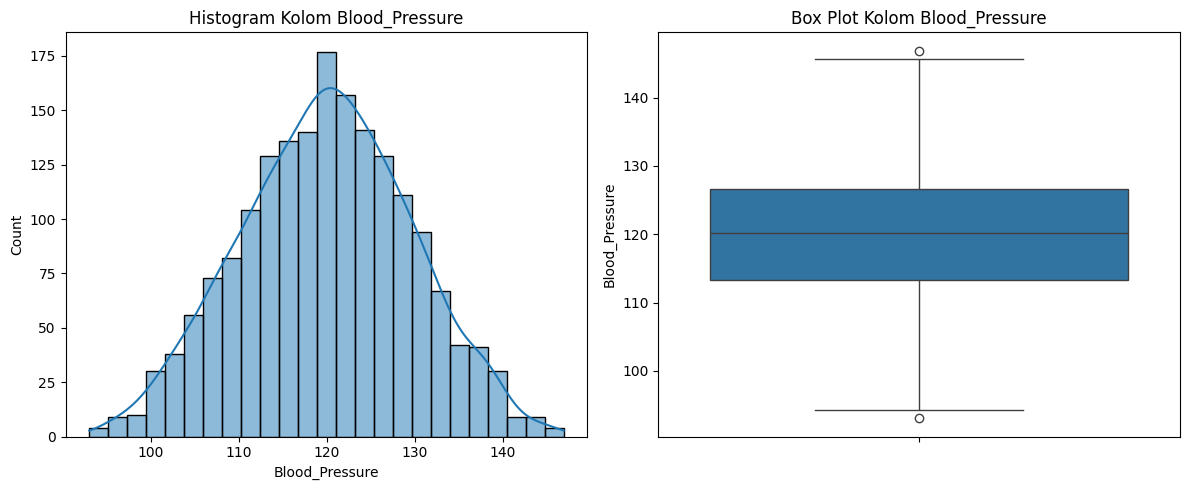

Hasil perhitungan skewness dari kolom Blood_Pressure :  -0.03351484110566547
Hasil perhitungan kurtosis dari kolom Blood_Pressure :  -0.3347424752773689


In [121]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        # Histogram
sns.histplot(dataset["Blood_Pressure"], kde=True, ax=axes[0])
axes[0].set_title(f'Histogram Kolom {"Blood_Pressure"}')

# Box Plot
sns.boxplot(y=dataset["Blood_Pressure"], ax=axes[1])
axes[1].set_title(f'Box Plot Kolom {"Blood_Pressure"}')

plt.tight_layout()
plt.show()

print ("Hasil perhitungan skewness dari kolom Blood_Pressure : ", getSkewness(dataset["Blood_Pressure"]))
print ("Hasil perhitungan kurtosis dari kolom Blood_Pressure : ", getKurtosis(dataset["Blood_Pressure"]))

Dari grafik tersebut, dapat dilihat bahwa data Blood_Pressure sedikit terlihat berdistribusi normal. Walaupun tidak sempurna, namun dapat dilihat bahwa data yang ada paling banyak berdistribusi di dekat mediannya, dan menurun ketika lebih besar ataupun lebih kecil dari median. Tetapi karena nilai dari kurtosis yang sangat jauh dari 3, dapat disimpulkan data tidak berdistribusi normal.

### 5. Hipotesis 1 sampel
Untuk melakukan tes hipotesis, akan dilakukan 6 langkah berikut di setiap tesnya:
1. Tentukan Hipotesis nol 
2. Pilih hipotesis alternatif H1
3. Tentukan tingkat signifikan α.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis. 
5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang digunakan. 
6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan 

#### Pembuatan fungsi umum yang akan dipakai

In [122]:
import math
from scipy.stats import t

### t_test
def t_test_manual(sample_mean, population_mean,sample_std, n):
    return (sample_mean - population_mean) / (sample_std / math.sqrt(n))

def t_test_p_value(t_statistic, n):
    return 1 - t.cdf(t_statistic, n - 1)

def get_critical_value(alpha, n):
    return t.ppf(1 - alpha, n - 1)

def t_test_two_sample(sample1_mean, sample2_mean, sample1_std, sample2_std, n1, n2,d0):
    return ((sample1_mean - sample2_mean)- d0) / math.sqrt((sample1_std ** 2 / n1) + (sample2_std ** 2 / n2))

def t_test_two_sample_p_value(t_statistic, n1, n2):
    return 1 - t.cdf(t_statistic, n1 + n2 - 2)



##### 5.1 Rata-Rata berat badan pasien > 65


In [123]:

weight_data = dataset['Weight']

print("SECTION PERHITUNGAN MANUAL")
#   1. Tentukan Hipotesis Nol
#   Dari soal, digunakan H0 : μ = 65

#   2. Tentukan Hipotesis Alternatif
#   H1 : μ > 65

#3. Tentukan Tingkat Signifikansi
alpha = 0.05

#   4. Tentukan Uji Statistik yang sesuai dan tentukan Daerah Kritis
#   Karena populasi standar deviasi tidak diketahui, maka digunakan t-test

n = len(weight_data) # jumlah sampel
degree_of_freedom = n - 1

critical_value = get_critical_value(alpha , degree_of_freedom)
print(f"Critical Value Yang Didapat: {critical_value}")

#5. Hitung Nilai Uji Statistik
t_test_manual_result = t_test_manual(getMean(weight_data), 65, getStandarDeviasi(weight_data), n)
print()
print(f"Hasil Perhitungan t-test dengan fungsi sendiri: {t_test_manual_result}")


p_value_manual = t_test_p_value(t_test_manual_result, n)
print(f"P-Value: {p_value_manual}")

#6. Ambil Keputusan
# if (t_test_manual_result > critical_value):
#     print("Tolak H0 karena nilai uji statistik berada di daerah kritis")
#     print ("Kesimpulan : Berat badan rata-rata tidak sama dengan 65")
# else:
#     print("Gagal tolak H0 karena nilai uji statistik tidak berada di daerah kritis")
#     print ("Kesimpulan : Berat badan rata-rata sama dengan 65")

if (p_value_manual < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    print ("Kesimpulan : Berat badan rata-rata lebih dari 65 kg")
else :
    print()
    print("Gagal Tolak H0 karena p-value lebih besar dari tingkat signifikansi")
    print ("Kesimpulan : Berat badan rata-rata tidak lebih dari 65 kg")


print("\nSECTION PERHITUNGAN LIBRARY")




SECTION PERHITUNGAN MANUAL
Critical Value Yang Didapat: 1.6456912916634057

Hasil Perhitungan t-test dengan fungsi sendiri: 22.55856165196407
P-Value: 0.0

Tolak H0 karena p-value lebih kecil dari tingkat signifikansi
Kesimpulan : Berat badan rata-rata lebih dari 65 kg

SECTION PERHITUNGAN LIBRARY


##### 5.2 Rata-rata tekanan darah sistole bernilai 120 mmHg

In [124]:
bp_data = dataset["Blood_Pressure"]

print("SECTION PERHITUNGAN MANUAL")
#   1. Tentukan Hipotesis Nol
#   Dari soal, digunakan H0 : μ = 120

#   2. Tentukan Hipotesis Alternatif
#   H1 : μ ≠ 120

#3. Tentukan Tingkat Signifikansi
alpha = 0.05

#   4. Tentukan Uji Statistik yang sesuai dan tentukan Daerah Kritis
#   Karena populasi standar deviasi tidak diketahui, maka digunakan t-test

n = len(bp_data) # jumlah sampel
degree_of_freedom = n - 1

# Menggunakan two-tailed test
critical_value = get_critical_value(alpha/2 , degree_of_freedom)
print(f"Critical Value Yang Didapat: ±{critical_value}")

#5. Hitung Nilai Uji Statistik
t_test_manual_result = t_test_manual(getMean(bp_data), 120, getStandarDeviasi(bp_data), n)
print()
print(f"Hasil Perhitungan t-test dengan fungsi sendiri: {t_test_manual_result}")

# Menggunakan two-tailed test
p_value_manual = 2 * t_test_p_value(t_test_manual_result, n)
print(f"P-Value (two-tailed): {p_value_manual}")

#6. Ambil Keputusan
# if (t_test_manual_result > critical_value):
#     print("Tolak H0 karena nilai uji statistik berada di daerah kritis")
#     print ("Kesimpulan : Berat badan rata-rata tidak sama dengan 65")
# else:
#     print("Gagal tolak H0 karena nilai uji statistik tidak berada di daerah kritis")
#     print ("Kesimpulan : Berat badan rata-rata sama dengan 65")

if (p_value_manual < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    print ("Kesimpulan : Rata-rata tekanan darah sistole sama dengan 120 ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    print ("Kesimpulan : Rata-rata tekanan darah sistole tidak sama dengan 120 ")


print("\nSECTION PERHITUNGAN LIBRARY")

t_statistic, p_value_two_tail = stats.ttest_1samp(bp_data, 120)
print(f"Hasil perhitungan t-test dengan library: {t_statistic}")
print(f"P-Value (two-tailed): {p_value_two_tail}")

if (p_value_two_tail < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    print ("Kesimpulan : Rata-rata tekanan darah sistole tidak sama dengan 120 ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    print ("Kesimpulan : Rata-rata tekanan darah sistole sama dengan 120 ")


SECTION PERHITUNGAN MANUAL
Critical Value Yang Didapat: ±1.961268282795866

Hasil Perhitungan t-test dengan fungsi sendiri: -0.2261110677219587
P-Value (two-tailed): 1.1788595878441583

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi
Kesimpulan : Rata-rata tekanan darah sistole tidak sama dengan 120 

SECTION PERHITUNGAN LIBRARY
Hasil perhitungan t-test dengan library: -0.22604900896791114
P-Value (two-tailed): 0.8211886711961978

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi
Kesimpulan : Rata-rata tekanan darah sistole sama dengan 120 


#### 5.3 Rata-rata waktu olahraga per minggu 200 orang pertama ≠ 15 jam

In [125]:
ex_data = dataset['Exercise_Hours_Per_Week'].head(200)

print("SECTION PERHITUNGAN MANUAL")
#   1. Tentukan Hipotesis Nol
#   Dari soal, digunakan H0 : μ = 150

#   2. Tentukan Hipotesis Alternatif
#   H1 : μ ≠ 150

#3. Tentukan Tingkat Signifikansi
alpha = 0.05

#   4. Tentukan Uji Statistik yang sesuai dan tentukan Daerah Kritis
#   Karena populasi standar deviasi tidak diketahui, maka digunakan t-test

n = len(ex_data) # jumlah sampel
degree_of_freedom = n - 1

# Menggunakan two-tailed test
critical_value = get_critical_value(alpha/2 , degree_of_freedom)
print(f"Critical Value Yang Didapat: ±{critical_value}")

#5. Hitung Nilai Uji Statistik
t_test_manual_result = t_test_manual(getMean(ex_data), 150, getStandarDeviasi(ex_data), n)
print()
print(f"Hasil Perhitungan t-test dengan fungsi sendiri: {t_test_manual_result}")

# Menggunakan two-tailed test
p_value_manual = 2 * t_test_p_value(t_test_manual_result, n)
print(f"P-Value (two-tailed): {p_value_manual}")

#6. Ambil Keputusan
if (p_value_manual < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")


print("\nSECTION PERHITUNGAN LIBRARY")

t_statistic, p_value_two_tail = stats.ttest_1samp(ex_data, 150)
print(f"Hasil perhitungan t-test dengan library: {t_statistic}")
print(f"P-Value (two-tailed): {p_value_two_tail}")

if (p_value_two_tail < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")

SECTION PERHITUNGAN MANUAL
Critical Value Yang Didapat: ±1.9720174778338955

Hasil Perhitungan t-test dengan fungsi sendiri: -443.4601864599468
P-Value (two-tailed): 2.0

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi
Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam 

SECTION PERHITUNGAN LIBRARY
Hasil perhitungan t-test dengan library: -442.35014670531683
P-Value (two-tailed): 8.643189870497475e-300

Tolak H0 karena p-value lebih kecil dari tingkat signifikansi
Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam 


#### 5.4 Penduduk dengan pendapatan yang lebih besar dari Rp 7.500.000,00 tidak sama dengan 30% dari data keseluruhan individu

In [126]:
# Membuat fungsi pembantu
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

def get_num_income_gt7m(income_data):
    num = sum(1 for income in income_data if income > 7500000)
    return num

def z_test_proportion_manual(count_p,n,p0):
    proportion = count_p/n
    se = math.sqrt((p0 * (1- p0))/n)
    z_statistic = (proportion - p0) /se
    return z_statistic

def get_propotion_p_value(z_statistic):
    return 2 * (1 - norm.cdf(abs(z_statistic)))

In [127]:
income_data = dataset["Income"]
#   1. Tentukan Hipotesis Nol
#   Dari soal, digunakan H0 : p = p0

#   2. Tentukan Hipotesis Alternatif
#   H1 : p ≠ p0

#   3. Tentukan Tingkat Signifikansi
alpha = 0.05

#   4. Tentukan Uji Statistik yang sesuai dan tentukan Daerah Kritis
#   Akan digunakan test proporsi

n_gt7m = get_num_income_gt7m(income_data)
n_all = len(income_data)
degree_of_freedom = n_gt7m -1
p0 = 0.30

# Menggunakan two-tailed test
critical_value = get_critical_value(alpha/2 , degree_of_freedom)
print(f"Critical Value Yang Didapat: ±{critical_value}")

#5. Hitung Nilai Uji Statistik
z_test_proportion_manual_result = z_test_proportion_manual(n_gt7m,n_all,p0)
print()
print(f"Hasil Perhitungan z-test dengan fungsi sendiri: {z_test_proportion_manual_result}")

# Menghitung p-value
p_value_manual = get_propotion_p_value(z_test_proportion_manual_result)
print(f"P-Value : {p_value_manual}")

#6. Ambil Keputusan
if (p_value_manual < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")

z_statistic, p_value = proportions_ztest(n_gt7m, n_all, value=p0, alternative='two-sided')
print()
print(f"Hasil perhitungan z-test dengan library: {z_statistic}")
print(f"P-Value: {p_value}")

if (p_value < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")





Critical Value Yang Didapat: ±1.974808091744976

Hasil Perhitungan z-test dengan fungsi sendiri: -19.610775355967004
P-Value : 0.0

Tolak H0 karena p-value lebih kecil dari tingkat signifikansi

Hasil perhitungan z-test dengan library: -31.487326653662826
P-Value: 1.2952616255233202e-217

Tolak H0 karena p-value lebih kecil dari tingkat signifikansi



Lembaga riset membagi data individu menjadi dua bagian, yaitu data individu yang lebih awal masuk data penelitian (bagian atas) dan yang baru saja (bagian bawah).

1.Periksa apakah rata-rata berat badan individu yang lebih awal masuk data penelitian sama dengan rata-rata berat badan individu yang masuk baru saja?
2. Bagaimana dengan pendapatan individu, apakah pendapatan sistole individu yang lebih awal masuk data penelitian lebih besar Rp 1.250.000,00 dari yang baru saja masuk?
3.Lembaga riset ingin membandingkan kondisi kesehatan individu dari dua bagian data. Apakah variansi tekanan darah individu yang lebih awal masuk data penelitian sama dengan yang baru saja masuk?
4. Apakah proporsi waktu olahraga yang lebih dari 8 jam per minggu pada data individu awal lebih besar daripada kuantitas proporsi pada data individu akhir dengan waktu olahraga yang sama?


### 6. Test 2 Sampel

#### 6.1 Rata-rata berat badan individu yang lebih awal masuk data penelitian = rata-rata berat badan individu yang masuk baru

In [128]:
from scipy.stats import ttest_ind

weight_data = dataset['Weight']
# Membagi data berat badan

half = len(weight_data) // 2

new_weight_data = weight_data[:half]
old_weight_data = weight_data[half:]

n_new = len(new_weight_data)
n_old = len(old_weight_data)
degree_of_freedom = n_old + n_new - 2

print("SECTION PERHITUNGAN MANUAL")
#   1. Tentukan Hipotesis Nol
#   Dari soal, digunakan H0 : μ1 = μ2

#   2. Tentukan Hipotesis Alternatif
#   H1 : μ1 ≠ μ2

#3. Tentukan Tingkat Signifikansi
alpha = 0.05

#   4. Tentukan Uji Statistik yang sesuai dan tentukan Daerah Kritis
#   Karena populasi standar deviasi tidak diketahui, maka digunakan t-test
# Menggunakan two-tailed test
critical_value = get_critical_value(alpha/2 , degree_of_freedom)
print(f"Critical Value Yang Didapat: ±{critical_value}")


#5. Hitung Nilai Uji Statistik
t_test_manual_result = t_test_two_sample(getMean(new_weight_data),getMean(old_weight_data),getStandarDeviasi(new_weight_data),getStandarDeviasi(old_weight_data),n_new,n_all,0)
print()
print(f"Hasil Perhitungan t-test dengan fungsi sendiri: {t_test_manual_result}")

# Menggunakan two-tailed test
p_value_manual = 2 * t_test_two_sample_p_value(t_test_manual_result,n_new,n_old)
print(f"P-Value (two-tailed): {p_value_manual}")

#6. Ambil Keputusan
if (p_value_manual < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")


print("\nSECTION PERHITUNGAN LIBRARY")

t_statistic, p_value = ttest_ind(new_weight_data,old_weight_data)
print(f"Hasil perhitungan t-test dengan library: {t_statistic}")
print(f"P-Value (two-tailed): {p_value}")

if (p_value < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")


SECTION PERHITUNGAN MANUAL
Critical Value Yang Didapat: ±1.9612690003064068

Hasil Perhitungan t-test dengan fungsi sendiri: 0.6853900112141849
P-Value (two-tailed): 0.4931851308800659

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi

SECTION PERHITUNGAN LIBRARY
Hasil perhitungan t-test dengan library: 0.5892616355548761
P-Value (two-tailed): 0.5557589101292489

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi


#### 6.2 Pendapatan sistole individu yang lebih awal masuk data penelitian lebih besar Rp 1.250.000,00 dari yang baru saja masuk

In [129]:
income_data = dataset['Income']
# Membagi data berat badan
# Old = dataset 1, New = dataset 2

half = len(income_data) // 2

old_income_data = income_data[:half]
new_income_data = income_data[half:]

n_old = len(old_income_data)
n_new = len(new_income_data)
degree_of_freedom = n_old + n_new - 2

print("SECTION PERHITUNGAN MANUAL")
#   1. Tentukan Hipotesis Nol
#   Dari soal, digunakan H0 : μ1 = μ2

#   2. Tentukan Hipotesis Alternatif
#   H1 : μ1 ≠ μ2

#3. Tentukan Tingkat Signifikansi
alpha = 0.05

#   4. Tentukan Uji Statistik yang sesuai dan tentukan Daerah Kritis
#   Karena populasi standar deviasi tidak diketahui, maka digunakan t-test
# Menggunakan two-tailed test
critical_value = get_critical_value(alpha/2 , degree_of_freedom)
print(f"Critical Value Yang Didapat: ±{critical_value}")


#5. Hitung Nilai Uji Statistik
t_test_manual_result = t_test_two_sample(getMean(old_income_data),getMean(new_income_data),getStandarDeviasi(old_income_data),getStandarDeviasi(new_income_data),n_old,n_new,1250000)
print()
print(f"Hasil Perhitungan t-test dengan fungsi sendiri: {t_test_manual_result}")

# Menggunakan two-tailed test
p_value_manual = t_test_two_sample_p_value(t_test_manual_result,n_new,n_old)
print(f"P-Value (two-tailed): {p_value_manual}")

#6. Ambil Keputusan
if (p_value_manual < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")


print("\nSECTION PERHITUNGAN LIBRARY")

t_statistic, p_value = ttest_ind(old_income_data,new_income_data, alternative="greater")
print(f"Hasil perhitungan t-test dengan library: {t_statistic}")
print(f"P-Value (two-tailed): {p_value}")

if (p_value < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")

SECTION PERHITUNGAN MANUAL
Critical Value Yang Didapat: ±1.9612690003064068

Hasil Perhitungan t-test dengan fungsi sendiri: -13.629319173411217
P-Value (two-tailed): 1.0

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi

SECTION PERHITUNGAN LIBRARY
Hasil perhitungan t-test dengan library: 0.23361961190588593
P-Value (two-tailed): 0.40765328709721643

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi


#### 6.3 Variansi tekanan darah individu yang lebih awal masuk data penelitian sama dengan yang baru saja masuk

In [130]:
from scipy.stats import f
from scipy.stats import levene

## Membuat helper function
def get_f_critical_value(alpha,df1,df2):
    return f.ppf(alpha/2,df1,df2)

def test_f_manual(s1,s2):
    return (s1**2)/(s2**2)

In [131]:
bp_data = dataset['Blood_Pressure']
# Membagi data berat badan
# Old = dataset 1, New = dataset 2

half = len(bp_data) // 2

old_bp_data = bp_data[:half]
new_bp_data = bp_data[half:]

n_old = len(old_bp_data)
n_new = len(new_bp_data)


print("SECTION PERHITUNGAN MANUAL")
#   1. Tentukan Hipotesis Nol
#   Dari soal, digunakan H0 : σ^21 = σ^22

#   2. Tentukan Hipotesis Alternatif
#   H1 : σ^21 ≠ σ^22

#3. Tentukan Tingkat Signifikansi
alpha = 0.05

#   4. Tentukan Uji Statistik yang sesuai dan tentukan Daerah Kritis
#   Untuk membandingkan antara dua variansi akan digunakan distirbusi f

df1 = n_old - 1
df2 = n_new - 1

s1 = getStandarDeviasi(old_bp_data)
s2 = getStandarDeviasi(new_bp_data)

lower_critical_value = get_f_critical_value(alpha/2,df1,df2)
upper_critical_value = get_f_critical_value(1- alpha/2,df1,df2)
print(f"Critical Value Yang Didapat (lower): {lower_critical_value}")
print(f"Critical Value Yang Didapat (upper): {upper_critical_value}")


#5. Hitung Nilai Uji Statistik
f_test_manual_result = test_f_manual(s1,s2)
print()
print(f"Hasil Perhitungan t-test dengan fungsi sendiri: {f_test_manual_result}")

if f_test_manual_result >=1:
    p_value_manual = 2 * (1-f.cdf(f_test_manual_result,df1,df2))
else:
    p_value_manual = 2 * f.cdf(f_test_manual_result,df2,df1)
    
print(f"P-Value: {p_value_manual}")

#6. Ambil Keputusan
if (p_value_manual < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")


print("\nSECTION PERHITUNGAN LIBRARY")

f_statistic, p_value = levene(old_bp_data, new_bp_data, center='mean')
print(f"Hasil perhitungan t-test dengan library: {f_statistic}")
print(f"P-Value (two-tailed): {p_value}")

if (p_value < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")

SECTION PERHITUNGAN MANUAL
Critical Value Yang Didapat (lower): 0.8618165943600785
Critical Value Yang Didapat (upper): 0.9979238990497744

Hasil Perhitungan t-test dengan fungsi sendiri: 1.0818050447615366
P-Value: 0.23581158482698195

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi

SECTION PERHITUNGAN LIBRARY
Hasil perhitungan t-test dengan library: 1.8774110434711422
P-Value (two-tailed): 0.17079767962222844

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi


#### 6.4 Proporsi waktu olahraga yang lebih dari 8 jam per minggu pada data individu awal lebih besar daripada kuantitas proporsi pada data individu akhir dengan waktu olahraga yang sama

In [132]:
### Membuat fungsi pembantu
def get_num_hour_gt8(dataset):
    num = sum(1 for data in dataset if data > 8)
    return num

def z_proportion_two_sample(x1,x2,n1,n2):
    p_hat = (x1 + x2)/ (n1 + n2)
    p1 = x1 / n1
    p2 = x2 / n2
    q = 1 - p_hat
    z_statistic = (p1 - p2) / math.sqrt(p_hat * q * ((1/n1) + (1/n2)))
    return z_statistic


In [133]:
ex_data = dataset['Exercise_Hours_Per_Week']
# Membagi data berat badan
# Old = dataset 1, New = dataset 2

half = len(ex_data) // 2

old_ex_data = ex_data[:half]
new_ex_data = ex_data[half:]

n_old = len(old_ex_data)
n_new = len(new_ex_data)


print("SECTION PERHITUNGAN MANUAL")
#   1. Tentukan Hipotesis Nol
#   Dari soal, digunakan H0 : Proporsi waktu olahraga yang lebih dari 8 jam per minggu pada data individu awal sama dengan kuantitas proporsi pada data individu akhir dengan waktu olahraga yang sama

#   2. Tentukan Hipotesis Alternatif
#   H1 : Proporsi waktu olahraga yang lebih dari 8 jam per minggu pada data individu awal lebih besar daripada kuantitas proporsi pada data individu akhir dengan waktu olahraga yang sama

#3. Tentukan Tingkat Signifikansi
alpha = 0.05

#   4. Tentukan Uji Statistik yang sesuai dan tentukan Daerah Kritis
#   Untuk membandingkan antara dua variansi akan digunakan distirbusi f

x1 = get_num_hour_gt8(old_ex_data)
x2 = get_num_hour_gt8(new_ex_data)



critical_value = norm.ppf(alpha)
print(f"Critical Value Yang Didapat: {critical_value}")


#5. Hitung Nilai Uji Statistik
z_test_manual_result = z_proportion_two_sample(x1,x2,n_old,n_new)
print()
print(f"Hasil Perhitungan z-test dengan fungsi sendiri: {z_test_manual_result}")

p_value_manual = 1 - norm.cdf(z_test_manual_result)    
print(f"P-Value : {p_value_manual}")

#6. Ambil Keputusan
if (p_value_manual < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")


print("\nSECTION PERHITUNGAN LIBRARY")

count = [x1,x2]
nobs = [n_old,n_new]
z_statistic, p_value = proportions_ztest(count, nobs, alternative='larger')

print(f"Hasil perhitungan z-test dengan library: {z_statistic}")
print(f"P-Value : {p_value}")

if (p_value < alpha):
    print()
    print("Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama tidak sama dengan 150 jam ")
else:
    print()
    print("Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi")
    # print ("Kesimpulan : Rata-rata waktu olahraga per minggu 200 orang pertama sama dengan 150 jam ")

SECTION PERHITUNGAN MANUAL
Critical Value Yang Didapat: -1.6448536269514729

Hasil Perhitungan z-test dengan fungsi sendiri: 0.5966949094870971
P-Value : 0.275355545943881

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi

SECTION PERHITUNGAN LIBRARY
Hasil perhitungan z-test dengan library: 0.5966949094870971
P-Value (two-tailed): 0.27535554594388106

Gagal Tolak H0 karena p-value lebih kecil dari tingkat signifikansi
